# Import libraries

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Load audio file

In [2]:
filename = "./dataset/valid/bass_electronic_000-034-100.wav"
y, sr = librosa.load(filename) 

# Spectrogram and RMS

(1, 173)


[Text(0.5, 1.0, 'Spectrogram')]

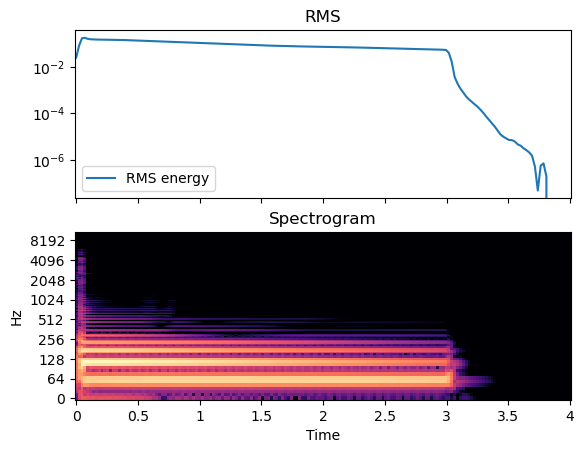

In [3]:
# Spectrogram
D = np.abs(librosa.stft(y))
D_dB = librosa.amplitude_to_db(D, ref=np.max)

# RMS
rms = librosa.feature.rms(S=D)
print(rms.shape)

# Display Plots
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
ax[0].set(title='RMS')

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Spectrogram')

# Chroma

(12, 173)
(12, 173)
(12, 173)


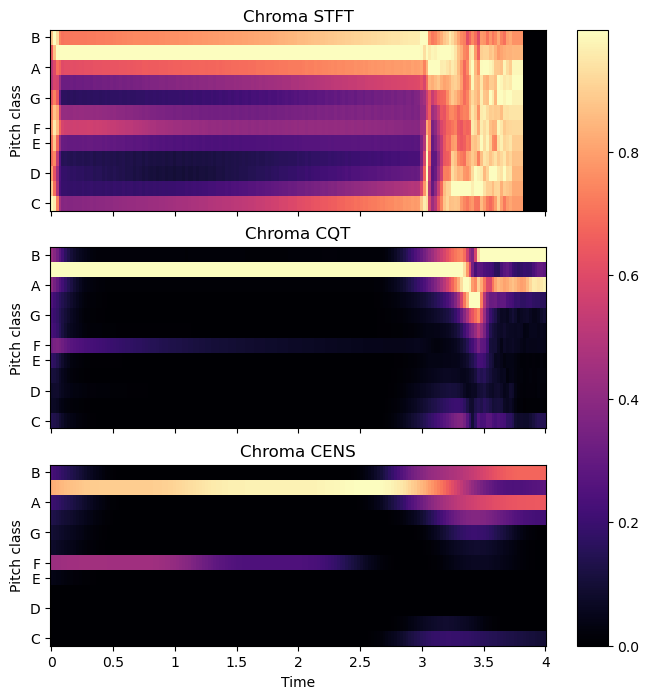

In [4]:
# Chroma
chroma_stft = librosa.feature.chroma_stft(S=D, sr=sr) # STFT
print(chroma_stft.shape)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr) # CQT
print(chroma_cq.shape)
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr) # Chroma Energy Normalized (CENS)
print(chroma_cens.shape)

# Display Plots
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(8,8))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='Chroma STFT')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma CQT')
ax[1].label_outer()
img = librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[2])
ax[2].set(title='Chroma CENS')
fig.colorbar(img, ax=ax)

# Mel-Spectrogram

[Text(0.5, 1.0, 'Mel-Spectrogram')]

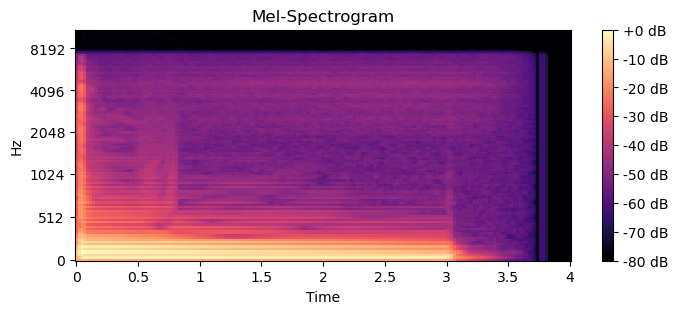

In [5]:
# Mel-Spectrogram
S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=128) # n_mels = 128 
#S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=256) # n_mels = 256 
S_dB = librosa.power_to_db(S, ref=np.max)

# Display Spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(8,3))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Mel-Spectrogram')

# MFCC (N_MFCC = 13)

(13, 173)
(13, 173)
(13, 173)


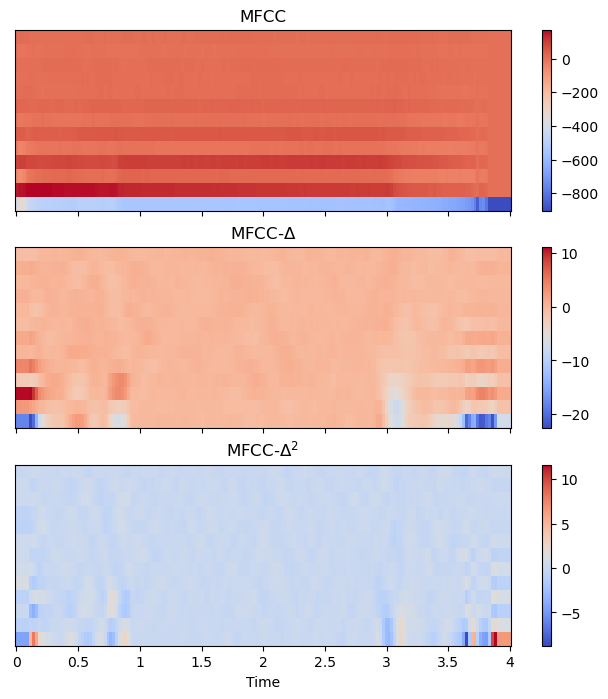

In [6]:
# MFCC
mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=13)  
print(mfcc.shape)
mfcc_delta = librosa.feature.delta(mfcc)
print(mfcc_delta.shape)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
print(mfcc_delta2.shape)

# Display Plots
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(8,8))
img1 = librosa.display.specshow(mfcc, ax=ax[0], x_axis='time')
ax[0].set(title='MFCC')
ax[0].label_outer()
img2 = librosa.display.specshow(mfcc_delta, ax=ax[1], x_axis='time')
ax[1].set(title=r'MFCC-$\Delta$')
ax[1].label_outer()
img3 = librosa.display.specshow(mfcc_delta2, ax=ax[2], x_axis='time')
ax[2].set(title=r'MFCC-$\Delta^2$')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])
fig.colorbar(img3, ax=[ax[2]])

# MFCC (N_MFCC = 26)

(26, 173)
(26, 173)
(26, 173)


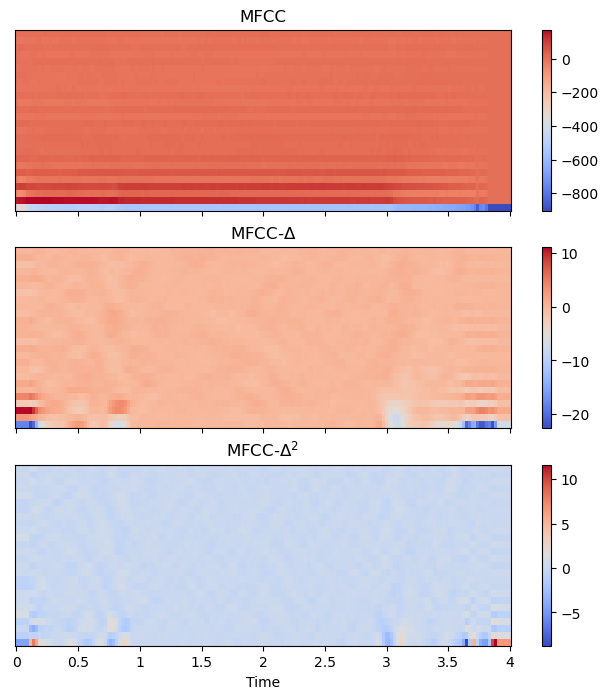

In [7]:
# MFCC
mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=26)  
print(mfcc.shape)
mfcc_delta = librosa.feature.delta(mfcc)
print(mfcc_delta.shape)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
print(mfcc_delta2.shape)

# Display Plots
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(8,8))
img1 = librosa.display.specshow(mfcc, ax=ax[0], x_axis='time')
ax[0].set(title='MFCC')
ax[0].label_outer()
img2 = librosa.display.specshow(mfcc_delta, ax=ax[1], x_axis='time')
ax[1].set(title=r'MFCC-$\Delta$')
ax[1].label_outer()
img3 = librosa.display.specshow(mfcc_delta2, ax=ax[2], x_axis='time')
ax[2].set(title=r'MFCC-$\Delta^2$')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])
fig.colorbar(img3, ax=[ax[2]])

# Spectral Statistics: Centroid and Bandwidth

(1, 173)
(1, 173)


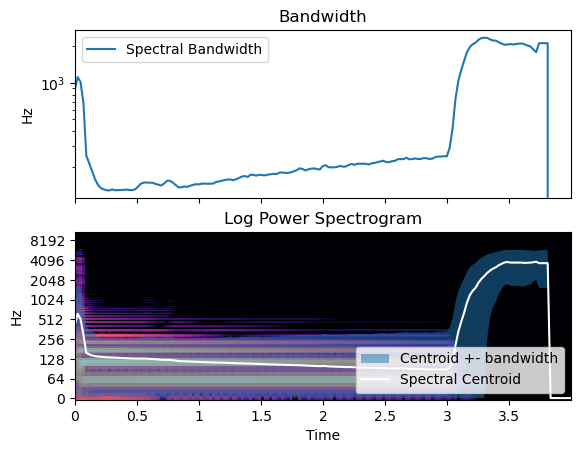

In [8]:
# Centroid and Bandwidth
spec_centroid = librosa.feature.spectral_centroid(S=D)
print(spec_centroid.shape)
spec_bw = librosa.feature.spectral_bandwidth(S=D)
print(spec_bw.shape)

# Display Plots
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
ax[0].semilogy(times, spec_bw[0], label='Spectral Bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
ax[0].set(title='Bandwidth')

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Log Power Spectrogram')
ax[1].fill_between(times, np.maximum(0, spec_centroid[0] - spec_bw[0]),
                np.minimum(spec_centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, spec_centroid[0], label='Spectral Centroid', color='w')
ax[1].legend(loc='lower right')

# Spectral Statistics: Flatness and Rolloff

(1, 173)
(1, 173)
(1, 173)


[Text(0.5, 1.0, 'Log Power Spectrogram')]

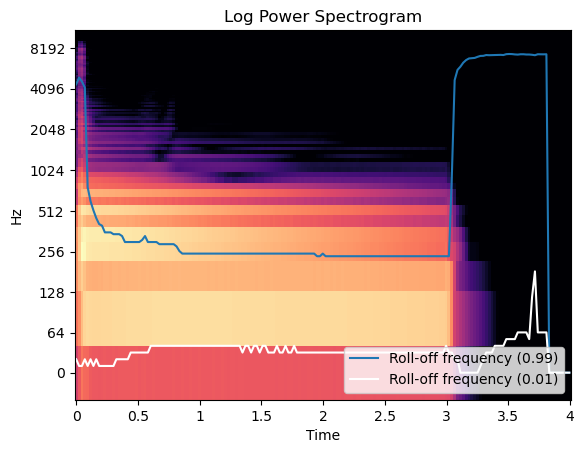

In [9]:
# Flatness and Rolloff
spec_flat = librosa.feature.spectral_flatness(S=D)
print(spec_flat.shape)

rolloff = librosa.feature.spectral_rolloff(y=y, roll_percent=0.99)
print(rolloff.shape)
rolloff_min = librosa.feature.spectral_rolloff(y=y, roll_percent=0.01)
print(rolloff_min.shape)

# Display Plots
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='Log Power Spectrogram')

# Spectral Statistics: Polynomial Features

(1, 173)
(2, 173)
(3, 173)


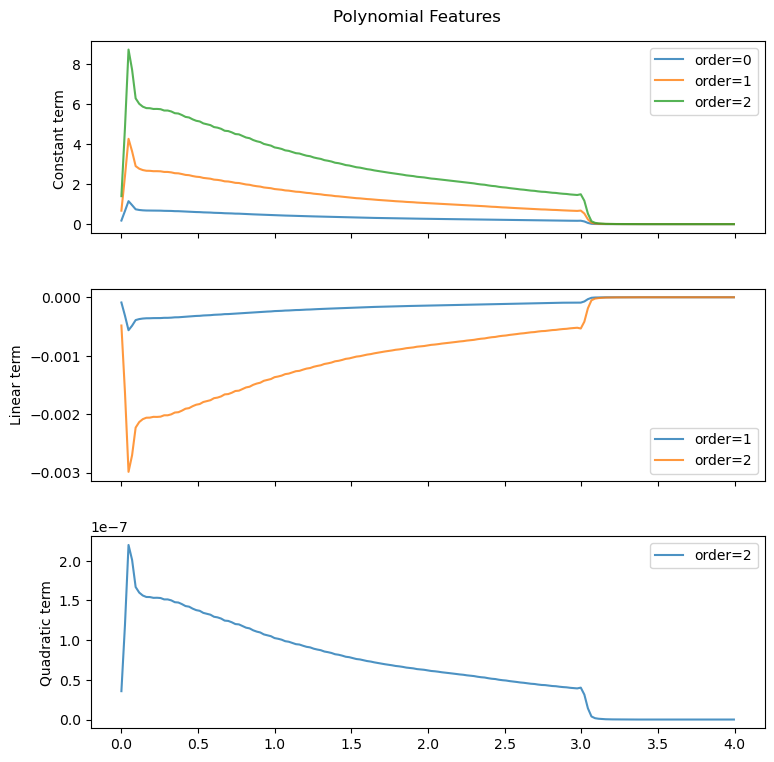

In [10]:
# Polynomial Features
p0 = librosa.feature.poly_features(S=D, order=0)
print(p0.shape)
p1 = librosa.feature.poly_features(S=D, order=1)
print(p1.shape)
p2 = librosa.feature.poly_features(S=D, order=2)
print(p2.shape)

# Display Plots
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(8, 8))
fig.tight_layout(pad=3.0)
fig.suptitle('Polynomial Features')
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()

# Zero-Crossing Rate

(1, 173)


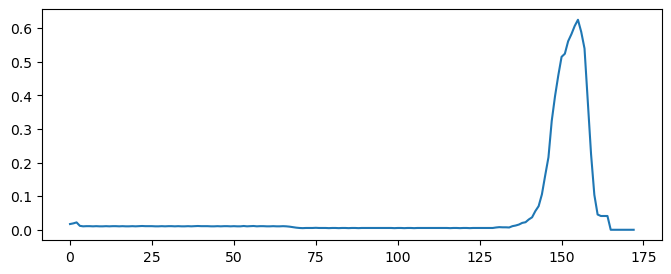

In [11]:
# Zero-Crossing
zcr = librosa.feature.zero_crossing_rate(y)
print(zcr.shape)

plt.figure(figsize=(8, 3))
plt.plot(zcr[0])

# Tonal Centroids

(6, 173)


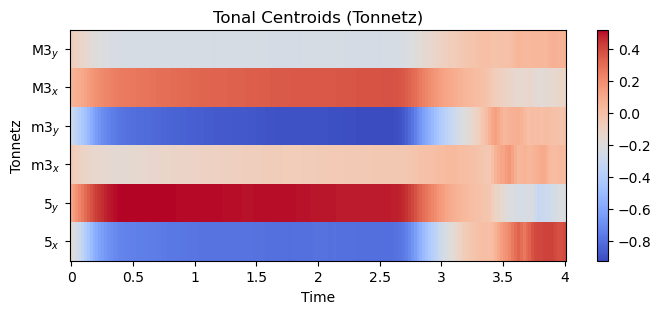

In [12]:
# Tonnetz
harmonics = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=harmonics, sr=sr)
print(tonnetz.shape)

fig, ax = plt.subplots(figsize=(8, 3))
img1 = librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time')
ax.set(title='Tonal Centroids (Tonnetz)')
fig.colorbar(img1)

# Spectral Flux Onset Strength

(4, 173)


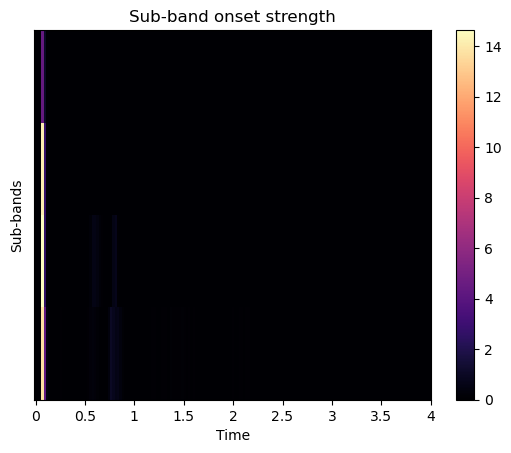

In [13]:
onset_subbands = librosa.onset.onset_strength_multi(y=y, sr=sr, channels=[0, 32, 64, 96, 128])
print(onset_subbands.shape)

fig, ax = plt.subplots()
img = librosa.display.specshow(onset_subbands, x_axis='time')
ax.set(ylabel='Sub-bands', title='Sub-band onset strength')
fig.colorbar(img, ax=ax)